In [55]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import random

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [155]:
test = pd.read_csv("train.csv")

In [163]:
class ToTensor(object):
    
    def __call__(self, sample):
        
        tensor = torch.from_numpy(np.array(sample["image"]))
        target = torch.from_numpy(np.array(sample["target"]))
        
        return {"target":target, "image":tensor}

class mnist_dataset(Dataset):
    
    def __init__(self, csv_file, transform = None):
        
        df = pd.read_csv(csv_file)
        pd.get_dummies(df["label"].values)
        self.target = pd.get_dummies(test["label"]).values
        self.variable = df.drop(columns=["label"]).values
        self.transform = transform
        
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, idx):
        
        sample = {'target':self.target[idx],'image':self.variable[idx]}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

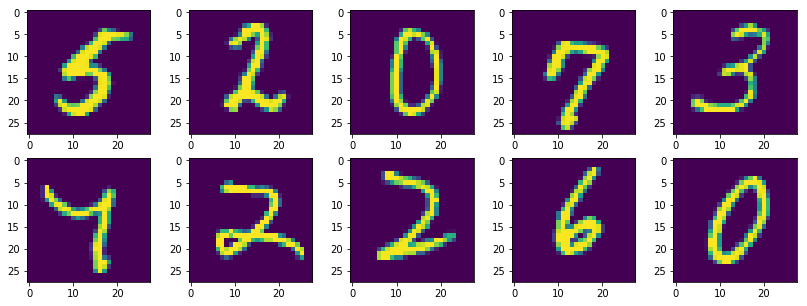

In [172]:
#load dataset
mnist_df = mnist_dataset("train.csv")

#plot some images
fig = plt.figure(figsize=(14,5))
for i in range(1,11):
    plt.subplot(2,5,i)
    idx = random.randint(0, len(mnist_df)-1)
    plt.imshow(mnist_df[idx]["image"].reshape(28,28))

plt.show()

In [173]:
batch_size, D_in, H_layers, D_out = 4, 784, 1000, 10

# 1 layer Neural Network

batch_size = 32
input_size = mnist_df[0]["image"].size
output_layer_size = mnist_df[0]["target"].size
hidden_layer_size = 100

mnist_df = mnist_dataset("train.csv", transform = (ToTensor()))
dataset_loader = torch.utils.data.DataLoader(mnist_df, batch_size=4, shuffle=True)

In [174]:
w1 = torch.randn(input_size, hidden_layer_size, dtype = torch.float)
w2 = torch.randn(hidden_layer_size, output_layer_size, dtype = torch.float)

torch.Size([784, 100])

In [69]:

device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 34189644.0
1 29711042.0
2 25080740.0
3 18660142.0
4 12330950.0
5 7497069.0
6 4546526.0
7 2902201.25
8 2006440.75
9 1492909.875
10 1173900.875
11 957528.6875
12 799244.8125
13 677228.875
14 579924.8125
15 500347.90625
16 434364.65625
17 379013.25
18 332180.4375
19 292356.6875
20 258268.796875
21 228920.875
22 203582.75
23 181601.8125
24 162425.640625
25 145649.0625
26 130930.4453125
27 117981.171875
28 106551.515625
29 96440.2890625
30 87453.6875
31 79450.4375
32 72303.5390625
33 65906.796875
34 60172.09375
35 55019.1796875
36 50379.0234375
37 46193.25
38 42412.546875
39 38990.953125
40 35888.5859375
41 33071.70703125
42 30509.693359375
43 28177.359375
44 26056.974609375
45 24121.87109375
46 22351.509765625
47 20729.916015625
48 19243.84765625
49 17879.345703125
50 16626.712890625
51 15475.47265625
52 14414.658203125
53 13436.5048828125
54 12533.4931640625
55 11699.3125
56 10928.251953125
57 10214.3896484375
58 9553.46875
59 8940.7294921875
60 8371.9814453125
61 7843.9423828125
62 735

In [ ]:
# -*- coding: utf-8 -*-
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()